In [656]:
import numpy as np
import os
from PIL import Image, ImageOps  
from matplotlib import pyplot as plt
from scipy import stats
import statistics

image_1 = Image.open("color/image1.jpg")
image_2 = Image.open("color/image2.jpg")

width_1, height_1 = image_1.size
width_2, height_2 = image_2.size
size = min(width_1, width_2), min(height_1, height_2)

image_1_grayscale = image_1.convert('L')
image_2_grayscale = image_2.convert('L')

image_1_grayscale = image_1_grayscale.resize(size, Image.BICUBIC)
image_2_grayscale = image_2_grayscale.resize(size, Image.BICUBIC)


image_1_grayscale.save("grayscale/image_1_grayscale.jpg")
image_2_grayscale.save("grayscale/image_2_grayscale.jpg")

## Before grayscale transformation

<img src = "color/image1.jpg" width=360 height=640>
<img src = "color/image2.jpg" width=600 height=400>

## After grayscale transformation

<img src = "grayscale/image_1_grayscale.jpg" width=360 height=640>
<img src = "grayscale/image_2_grayscale.jpg" width=600 height=400>

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 255]


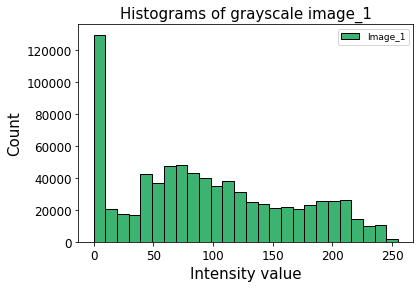

[129709.  20586.  17440.  17071.  42722.  37040.  47320.  48120.  43128.
  39884.  34835.  37987.  31373.  25032.  23594.  21367.  21542.  20711.
  23086.  25377.  25300.  26480.  13978.  10148.  10357.   2003.]


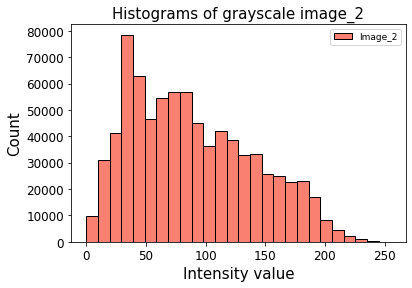

[9.7590e+03 3.1062e+04 4.1352e+04 7.8496e+04 6.2920e+04 4.6383e+04
 5.4430e+04 5.6665e+04 5.6676e+04 4.5121e+04 3.6477e+04 4.1904e+04
 3.8581e+04 3.2958e+04 3.3301e+04 2.5780e+04 2.4766e+04 2.2740e+04
 2.3195e+04 1.7060e+04 8.3440e+03 4.4470e+03 2.2730e+03 1.1380e+03
 3.4300e+02 1.9000e+01]


In [657]:
bins = list(range(0, 255, 10))
bins.append(255)
print(bins)
num_bins = int(255 / 10) + 1
bins_range = 0, 255

#image_1_grayscale = image_1_grayscale.resize(size, Image.BICUBIC)
#image_2_grayscale = image_2_grayscale.resize(size, Image.BICUBIC)

first_image_pixels = list(image_1_grayscale.getdata())
second_image_pixels = list(image_2_grayscale.getdata())

#Second image histogram
first_bins_values, _, _ = \
    plt.hist(first_image_pixels, num_bins, bins_range,label = "Image_1", facecolor='mediumseagreen', edgecolor='black', linewidth=1)

plt.title("Histograms of grayscale image_1",fontsize=15) 
plt.xlabel('Intensity value',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='upper right',fontsize=9)
plt.show()

print(first_bins_values)


#Second image histogram
second_bins_values, _, _ = \
    plt.hist(second_image_pixels, num_bins, bins_range,label = "Image_2", facecolor='salmon', edgecolor='black', linewidth=1)

plt.title("Histograms of grayscale image_2",fontsize=15) 
plt.xlabel('Intensity value',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='upper right',fontsize=9)

plt.show()
print(second_bins_values)


# Calculate means,

In [660]:
def mean(list_of_nums):
    total = 0 
    for num in list_of_nums:
        total = total + num
    return total / len(list_of_nums)

def mode(list_of_nums):
    mode = max(list_of_nums)  
    mode_index = list(list_of_nums).index(mode)
    return (mode_index*10, (mode_index+1)*10)

def median(list_of_nums):
    l = list(list_of_nums)
    l.sort()
    if len(l) % 2 != 0:
        middle_index = inf((len(l)- 1)/2)
        return l[middle_index]
    elif len(l) % 2 == 0:
        middle_index_1 = int(len(l)/2)
        middle_index_2 = int(len(l)/2)-1
        return_middle = (l[middle_index_1] + l[middle_index_2])/2
        return return_middle
    
def median_index(list_of_nums):
    l = list(list_of_nums)
    l.sort()
    if len(l) % 2 != 0:
        middle_index = inf((len(l)- 1)/2)
        return middle_index
    elif len(l) % 2 == 0:
        middle_index_1 = int(len(l)/2)
        middle_index_2 = int(len(l)/2)-1
        return (middle_index_2*10, middle_index_1*10)       

    

print('\t\t First histogram\t\t Second histogram')
print('mode\t\t', mode(first_bins_values),'\t\t\t', mode(second_bins_values))
print('mean\t\t', mean(first_bins_values),'\t\t', mean(second_bins_values))
print('Stand. deviation', np.std(first_bins_values), '\t\t',np.std(second_bins_values))
print('median \t\t',median(first_bins_values),'\t\t\t',median(second_bins_values))
print('median interval\t',median_index(first_bins_values),'\t\t\t',median_index(second_bins_values))
print('')

print('Histograms corr coeff: ', np.corrcoef(first_bins_values, second_bins_values)[0, 1])

print('Images corr coeff: ', np.corrcoef(first_image_pixels, second_image_pixels)[0, 1])




		 First histogram		 Second histogram
mode		 (0, 10) 			 (30, 40)
mean		 30622.69230769231 		 30622.69230769231
Stand. deviation 23010.341305209895 		 21097.248332733296
median 		 25166.0 			 32010.0
median interval	 (120, 130) 			 (120, 130)

Histograms corr coeff:  0.1679978640182132
Images corr coeff:  0.21311526959967772
